# Assignment06: Text Analysis 

## 1. Shakespeare Word Frequency

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [29]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.collocations import *

In [46]:
from nltk.probability import FreqDist

In [3]:
response = requests.get('https://www.gutenberg.org/files/1533/1533-h/1533-h.htm')

In [5]:
response

<Response [200]>

In [8]:
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\r\n<meta http-equiv="Content-Style-Type" content="text/css" />\r\n<title>The Project Gutenberg eBook of Macbeth, by William Shakespeare</title>\r\n<link rel="coverpage" href="images/cover.jpg" />\r\n<style type="text/css" xml:space="preserve">\r\n\r\nbody {margin-right: 15%;\r\n      margin-left: 15%;\r\n      text-align: justify}\r\n\r\nh1, h2, h3, h4 {text-align: center; font-style: normal; font-weight: normal;\r\nline-height: 1.5; margin-top: .5em; margin-bottom: .5em;}\r\n\r\nh1 {font-size: 200%;}\r\nh2 {font-size: 175%; margin-top: 2em; margin-bottom: 1em;}\r\nh3 {font-size: 150%; margin-top: 1em;}\r\nh4 {font-size: 120%;}\r\n\r\n.no-break {page-break-before: avoid;} /* for epubs */\r\n\r\ndiv.chapter {page-break-befor

In [10]:
macbeth_html = response.text 

document = BeautifulSoup(macbeth_html, "html.parser")

In [27]:
macbeth_script = "" 
for i in document.find_all('p'):
    macbeth_script += i.text

In [30]:
sent = sent_tokenize (macbeth_script)

In [68]:
macbeth_words = []
for s in sent:
    for w in word_tokenize(s):
        macbeth_words.append(w.lower()) #use lower() so that analysis will not be case sensitive 

In [69]:
print(macbeth_words)

['act', 'i', 'scene', 'i', '.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbeth', '’', 's', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park', 'or', 'lawn', ',', 'with', 'a', 'gate', 'leading', 'to', '

In [36]:
myStopWords = list(punctuation) + stopwords.words('english')

In [70]:
macbeth_wordsNoStop = []
for i in macbeth_words:
    if i not in myStopWords:
        macbeth_wordsNoStop.append(i)

In [39]:
print (macbeth_wordsNoStop)

['ACT', 'I', 'Scene', 'I', 'An', 'open', 'Place', 'Scene', 'II', 'A', 'Camp', 'near', 'Forres', 'Scene', 'III', 'A', 'heath', 'Scene', 'IV', 'Forres', 'A', 'Room', 'Palace', 'Scene', 'V.', 'Inverness', 'A', 'Room', 'Macbeth', '’', 'Castle', 'Scene', 'VI', 'The', 'Before', 'Castle', 'Scene', 'VII', 'The', 'A', 'Lobby', 'Castle', 'ACT', 'II', 'Scene', 'I.', 'Inverness', 'Court', 'within', 'Castle', 'Scene', 'II', 'The', 'Scene', 'III', 'The', 'Scene', 'IV', 'The', 'Without', 'Castle', 'ACT', 'III', 'Scene', 'I.', 'Forres', 'A', 'Room', 'Palace', 'Scene', 'II', 'The', 'Another', 'Room', 'Palace', 'Scene', 'III', 'The', 'A', 'Park', 'Lawn', 'gate', 'leading', 'Palace', 'Scene', 'IV', 'The', 'A', 'Room', 'state', 'Palace', 'Scene', 'V.', 'The', 'heath', 'Scene', 'VI', 'Forres', 'A', 'Room', 'Palace', 'ACT', 'IV', 'Scene', 'I', 'A', 'dark', 'Cave', 'In', 'middle', 'Cauldron', 'Boiling', 'Scene', 'II', 'Fife', 'A', 'Room', 'Macduff', '’', 'Castle', 'Scene', 'III', 'England', 'Before', 'King',

In [71]:
data_analysis = nltk.FreqDist(macbeth_wordsNoStop)

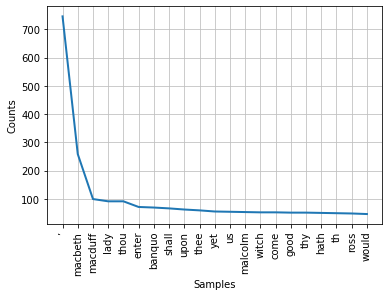

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [73]:
data_analysis.plot(21)

The 20 most frequent words in Macbeth do not give a strong sense of the plot of the story. One of the primary reasons that I think this is occuring is because many of the most frequent words could be considered stop words in Shakespearian English, and so the stop word list that I used would need to be modified. 

Initially, my analysis did not use the lower() function, and so the analysis was case sensitive, that is 'The' and 'the' would be considered separately. However, one result of using lower() was that 'MACBETH' and 'Macbeth' would not be considered the same word, where the former is actually representing the "lines" in the script, and not actual dialogue. As such, many of the names of characters that are represented in the most frequent words are over-representing frequencies, because they are counting occurences of names that do not include dialogue. 

## 2. Yelp Sentiments 

In [105]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...


True

In [106]:
sia = vader.SentimentIntensityAnalyzer()

In [89]:
# 5 stars 
philz1 = "I was having an awful morning. I came in for a delicious treat. When I asked Thaddeus (sp?) How he was, he signed 2 thumbs up. Then he asked me how I was. I said I was 2 thumbs down, but I want to get on HIS level  he patiently answered my question about parking, which gave me one thumb up. Then he set me up with my desired drink, which gave me 2 THUMBS UP!! Great service! GREAT coffee!"

In [108]:
sia.polarity_scores(philz1)

{'neg': 0.023, 'neu': 0.722, 'pos': 0.255, 'compound': 0.9677}

In [90]:
# 5 stars 
philz2 = ''' I love this Philz location. Everyone here is always friendly and upbeat.
I have the Philz app on my phone, and when I place an order, it's usually ready within 5-10 minutes. I'm amazed by the speed! I've been to other Philz locations pre-app days, including in Norcal, and ordering coffee used to take a lot longer. The app is a heaven-send.
The pour over method they use to make your coffee is wonderful. The iced Mint Mojito and Philtered Soul are my go-to drinks here. Also, the chocolate buttermilk donut is a must-try. It tastes so doughy and satisfying.
They have underground parking which is convenient. There are not very many cars when I go in the morning so I'm able to get in and out pretty quickly. '''

In [109]:
sia.polarity_scores(philz2)

{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.9737}

In [91]:
# 3 stars 
philz3 = '''Not the easiest place to find. It can't really be seen from the street view, since the store front doesn't face the Main Street.
There's plenty of outdoor seating under limited yellow umbrellas, and you can combine the tables together for larger parties.
I ordered through the mobile app and the app itself is very user friendly with pictures & descriptions of each drink. For the order, I got one hot and one iced mint mojito coffee.
They accidentally made two iced coffees. I let them know one of the coffee was supposed to be hot, so they quickly made a hot mint mojito coffee. However, I don't think they add enough sugar to the hot drink. It tasted more of straight black coffee, even after it cooled down.'''

In [110]:
sia.polarity_scores(philz3)

{'neg': 0.05, 'neu': 0.886, 'pos': 0.063, 'compound': 0.4068}

In [92]:
# 5 stars 
philz4 = '''Love the ample space outdoors!
+ umbrellas + lots of seating in the courtyard + wifi that can reach outside
+ you get your standard high quality Philz drinks
- no public bathrooms. just FYI'''

In [111]:
sia.polarity_scores(philz4)

{'neg': 0.061, 'neu': 0.716, 'pos': 0.224, 'compound': 0.7118}

In [94]:
# 5 stars
philz5 = '''Philz is one of my all time favorite coffee shops, sadly we don't have any in Boston yet but when I'm in a town that has one I always make it a priority. My go to drink is the iced mint mojito (creamy and sweet). You won't regret it, and despite the name there is no alcohol in it.'''

In [113]:
sia.polarity_scores(philz5)

{'neg': 0.076, 'neu': 0.843, 'pos': 0.081, 'compound': 0.0767}

In [95]:
# 5 stars
philz6= '''Not sure why I never knew there was a Philz in Culver City but I am so happy there is! I love Philz and have been a big fan of their coffee for a decade now (my friend brought me to a Philz in NorCal in 2011!). Even after all this time, I am still in love and obsessed.

My experience
I came here around 3:30pm on a Saturday. Only 2 customers in line before me and I only had to wait ~3 minutes before ordering. I ordered their iced mint mojito (my favorite drink of theirs), sweet and creamy with almond milk. The barista who made the drink made it consistent to all the other locations I have been to--so delicious! My drink was made ~5 minutes after ordering/paying. I was very happy because sometimes their Santa Monica Philz location is not consistent/a hit or miss.

Seating
All of the tables inside the shop were occupied with customers/couples studying or having a conversation. My sister and I easily found a table outside.

Location/Parking
Located right at the Culver Steps, right next door to Salt & Straw ice cream. Parking--metered street parking or parking garage next to Trader Joe's (first hour is free).

Definitely will be coming back!!'''

In [114]:
sia.polarity_scores(philz6)

{'neg': 0.023, 'neu': 0.75, 'pos': 0.227, 'compound': 0.9952}

In [96]:
# 5 stars
philz7 = '''I've loved Philz Coffee ever since my days in NorCal, and I don't even drink coffee on a daily basis! So on a day I legitimately needed some coffee, it was nice to be able to stop by here before getting some ice cream at neighboring Salt & Straw.

The one thing I have really been a fan of Philz is their multiple coffee blend options at dark, medium, or light roasts. Since I am pretty sensitive to caffeine now, Philz's dark roasts are perfect for me. Got the Ether, which I used to get all the time back in the day. Still tastes as good as it used to. Totally what I needed!

Service is perfect, as usual. You order your coffee at the register first, wait around for them to make the coffee fresh, and collect it after they call your name. May be confusing at first if you've never been here. But it beats premade crap that they just fill up from a container.

Wish there was a Philz around my area, but since this is around my girlfriend's area this will do.'''

In [115]:
sia.polarity_scores(philz7)

{'neg': 0.034, 'neu': 0.857, 'pos': 0.109, 'compound': 0.9047}

In [97]:
# 4 stars
philz8 = '''Great coffee. Flavorful and so many great options to choose from.  I usually go for the Philtered Soul and every time
It's great.  The flavors are what get me hooked.

However, their iced coffee in my opinion is awful.  Stick w the hot coffee and you won't be disappointed'''

In [116]:
sia.polarity_scores(philz8)

{'neg': 0.05, 'neu': 0.695, 'pos': 0.255, 'compound': 0.9247}

In [98]:
# 5 stars 
philz9 = '''I ordered a Medium Philtered Soul via mobile. I received a notification to let me know my drink was ready @ 7:35am. When I arrived my drink wasn't on the to go to counter. I informed the baristas (two ladies) that my drink wasn't there someone had taken my order by accident ?

One of the ladies made my drink and did a complimentary large drink along with a poppy seed cream cheese bagel.

Super friendly and fast service. I was on my way to work and she made my day (sorry didn't catch her name). Made my morning! Thank you!'''

In [117]:
sia.polarity_scores(philz9)

{'neg': 0.03, 'neu': 0.818, 'pos': 0.152, 'compound': 0.9097}

In [99]:
# 5 stars
philz10 = '''My friend and I decided to hang out in downtown Culver City one Saturday this month, and we started off with a visit to Philz. We parked at a nearby parking garage and walked over.

I asked the barista what she recommends and she recommended their Mint Mojito. I don't remember what is in it but I was able to get it with oat milk (since I'm vegan) and I had them prepare it the "house way". And it was delicious! I definitely recommend it if you haven't tried it yet because the drink is really fantastic. My friend and I are both not big coffee drinkers but we both got the Mint Mojito and loved it.'''

In [118]:
sia.polarity_scores(philz10)

{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.9862}

In [100]:
# 5 stars
philz11 = '''It was nice to see a Philz location in Culver City. Philz is part of The Culver Steps with plenty of outdoor spots to enjoy your coffee. It's near the Salt & Straw in case you don't spot it immediately if you are driving down Culver Blvd.

I am already a fan of their app because it's easy to reorder my favorite drinks with accurate pickup times. I ordered the Philtered Soul Cold Brew for myself and the Iced Mocha Tesora for my husband. They made our favorite drinks with our milk and sweetness preferences, and it gave us the caffeine kick we wanted.

When I arrived to pick up our drinks, they seemed like an upbeat team with their friendly greeting. They follow safe protocols. With 5 star coffee and service, I may start going here more often.'''

In [119]:
sia.polarity_scores(philz11)

{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9828}

In [101]:
# 5 stars
philz12 = '''I've been anticipating a Philz in Culver City for years now and it's finally here! Conveniently located at the beautiful Culver Steps.
I'm a die hard Philz fan and typically have 2-4 bags of Philz Coffee in my kitchen.

The darker roast are my favorites, especially the Ether (my #1), Tantalizing Turkish, and Julie's Ultimate. However, Philz makes it best so I frequently travel the distance to get a fresh cup made the "Philz Way". Super excited to no longer have to travel for the BEST coffee in town!

They offer a variety of iced coffee specialties as well. The Iced Mint Mojito is refreshingly addictive and now I'm just as hooked on the Gingersnap (OMG!). Finally, the Mission Cold Brew 32oz will satisfy your cold brew coffee fix for a couple of days. I like it over ice with a little oat milk while I'm working.

Philz has the most personable baristas and the customer service here is nothing short of what I always get at Philz. The store supervisor is super cool too.

There's plenty of underground parking and you get 1 hour free.'''

In [120]:
sia.polarity_scores(philz12)

{'neg': 0.036, 'neu': 0.753, 'pos': 0.212, 'compound': 0.9893}

In [102]:
# 5 stars
philz13 = '''Disclaimer: I grew up on the Bay, frequented Philz when I lived in Santa Monica, my friend gave out Philz beans at his wedding, and now I'm crazy psyched that Philz now resides within walking distance of my home!

Visited the Grand Opening this morning to pick up a Mocha Tesora + Mint Mojito! Signature delicious as usual and the new Philz team was excellent!

Culver City, meet Philz Coffee!!!

'''

In [121]:
sia.polarity_scores(philz13)

{'neg': 0.031, 'neu': 0.78, 'pos': 0.189, 'compound': 0.9241}

In [103]:
# 5 stars 
philz14 = '''It's here!! An Angeleno after living up in the Bay, I became a fan of Philz and their Iced Mint Mojito drink! It's not only one of my go-to drinks from here but also love their beans like Philtered Soul, and Tesora. I became a true coffee lover living in the bay. I get myself the whole beans to make my coffee at home now :) Yes, I grind the beans and aeropress it.

I'm excited to have them in my backyard in Culver City now! Friendly staff offering a free cup of coffee through their app on opening day and free small pastry, too!

Ordered through their app which was built great, easy to customize your coffee and easy to use. You can choose the pick up time and updates you. Thanks Melissa, who made my mint iced mojito with love!

Parking garage and street parking available.

If you want to pair your coffee with delicious empanadas, I recommend dropping by Grand Casino Cafe on Main St, a 2 min. walking distance.

Happy Coffee Drinking!!'''

In [122]:
sia.polarity_scores(philz14)

{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9983}

In [104]:
# 4 stars
philz15 = '''I went to pick up the $1off mocha for national coffee yesterday, and was pretty good!

Drink: The mocha Tesora was a little bit too chocolate-y, which is my only criticism.

Pickup: staff were super friendly and picking up mobile orders is easy with the large name labels on the cups sitting at the bar.

Parking: plentiful underneath the Culver steps

Seating: amazing....it's essentially in an ihr an park...sit at the cafe or at the actual steps!'''

In [123]:
sia.polarity_scores(philz15)

{'neg': 0.033, 'neu': 0.779, 'pos': 0.188, 'compound': 0.9298}

## 3. Movie Reviews 

In [124]:
import pandas as pd
from pathlib import Path  
import glob

In [125]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [137]:
myStopWords = list(punctuation) + stopwords.words('english')

In [130]:
bee1 = '''This is far from the worst movie ever(Disaster Movie) or the worst animated animated movie ever(Titanic:The Animated Movie), but despite its neat concept Bee Movie doesn't completely hold together consequently it is one of Dreamworks' weaker movies, Shark Tale being their worst.

Granted, there are things to like. The animation is gorgeous. The character designs are good enough, but the colours and backgrounds are the real revelations, as well as some of the visual gags. The music is a nice touch as well, the orchestral music is bright and breezy and the song in the end scene was lovely. I also loved the concept, and in the first half the film did work really well with it. It was original and well-written up to a certain point. The script in general is sassy and smart with the odd amusing pun, the pace to start with is brisk and the voice acting is solid with Jerry Seinfeld energetic, Renee Zellwegger warm and endearing and an assortment of effective cameos especially Ray Liotta's.

However, the film's problems come in the second half, and the start of those problems are with the courtroom scene which came across as forced and only slightly funny. Storywise, the last half hour feels like a different movie, first it is all warm, smart and infectious then it is close to serious and heavy-handed, and it also seemed as though the writers had run out of ideas. While there are some good jokes, others aren't so funny as it is the sort of humour that goes over the audience's heads, and the pace sags quite badly towards the end.

All in all, it isn't bad but it could have been better with a tighter second half and a more consistent set of ideas. 6/10 Bethany Cox'''

In [131]:
bee2 = '''Barry B. Benson (Jerry Seinfeld) is a bee who just graduated from college. He is dismayed that he has to pick one job for the rest of his life without a day off. Instead of working in the hive, he joins the pollen jockeys who fly outside. Talking to humans is strictly forbidden but that's exactly what Barry does when florist Vanessa Bloome (Renée Zellweger) saves his life. He can't settle on a job for 3 whole days. He is shocked to find that humans are stealing honey from bees. So he decides to sue the human race. Then nature is destroyed in an apocalypse. How fun!

Jerry Seinfeld is being Jerry Seinfeld except he's a bee. Talking to humans diminishes the magic of the bee world. It's not that the bee world is that magical or fascinating. It's bright and yellow. But it's very workaday. The marrying of bee world with references to the real world is cute for a little while but it gets tiresome. Then the whole trial thing gets to be just stupid and not actually funny. It's an OK movie that is essentially a 90 minute take of a Seinfeld standup of what if he's a bee.'''

In [132]:
bee3 = '''When the bee Barry B. Benson graduates from college, he finds that will have only one job for his entire life, and absolutely disappointed, he joins the team responsible for bringing the honey and pollination of the flowers to visit the world outside the hive. Once in Manhattan, he is saved by the florist Vanessa and he breaks the bee law to thank Vanessa. The become friends and Barry discovers that humans explore bees to sell the honey they produce. Barry decides to sue the human race, with destructive consequences to nature.

"Bee Movie" has a great animation, but unfortunately is silly with an absurd storyline. I do not understand what the writer might have in his mind with such lack of message; maybe a child could have written a better and more intelligent plot. The lead character in funny but has an annoying voice. I love animations, especially those with good messages. However, is so inaccurate and stupid that even for children I believe this movie does not work well. My vote is five.
'''

In [133]:
bee4 = '''I'm kind of surprised that not every single review has this as a summary line ... then again maybe it's better that way - I can use it with less guilt and it has probably a better effect.

Bees ... for the longest time they had a bad rep. And I reckon they still have - especially when you are eating (outside) and they come and you sort of panic. Though I'm not sure if it's bees every time. They (wasps) have similar traits and looks. They also are useful to nature, in a different way then bees, but still.

So taking a bit of the fear(s) many have of those insects is not a bad thing. You may have issues with how they are being humanized (with these movies they all talk and do other human stuff that is not in their actual nature), but you have to sell a movie to kids and their parents, so just suspend your disbelief.

Voice talent at hand is really good and the story flows (or flies?) along nicely. If you are a fan of Seinfeld even better - but I think even those who may not be too aware of him, will have lots of fun.'''

In [134]:
bee5 = '''"Mildly amusing" is probably the best description of this recently-released (on DVD) animated feature. My reviews on animated movies are what I thought of it as an adult, and how adults would relate to it. For this one, I'd say this is not a film adults will run out and buy: rent - yes/maybe; purchase - no.

The animation and story might be something kids will still enjoy but most of the gags fall flat for adults, although it does have a few clever things in it. It just isn't up to some of the truly funny animated films of the past few years. That said, it was still fun to watch with some humorous drawings in the background that you have to watch for quickly.

As for the story, for a film with a lot of politically-correct messages, stereotypical characters, Liberal icons plugged, etc., it was surprising to see a commonsense "if it ain't broke, don't fix it" conclusion. Kudos for that, but there are just too many dumb parts in this story. The connection of a talking bee with a human girlfriend was too ludicrous to be entertaining, as were the courtroom scenes.

The animation was fair. Yes, a story with flowers as a key ingredient is going to be colorful, so there is plenty of color but it looked kind of washed out and blah to what it could have been (i.e. "Cars," "Polar Express," etc.). I expected more out of a Dreamworks film.

Overall, for adults: skip it. It just isn't funny enough to invest your time. For the little kids, sure - they'll like it. They like almost almost any animated movie.'''

In [168]:
bee_reviews = [] 
bee_reviews.append(bee1) 
bee_reviews.append(bee2) 
bee_reviews.append(bee3) 
bee_reviews.append(bee4) 
bee_reviews.append(bee5) 

In [146]:
bee_review_words = [] 
for i in bee_reviews:
    bee_review_words.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])

In [148]:
from nltk.stem.porter import PorterStemmer

In [149]:
p_stemmer = PorterStemmer()

In [151]:
listOfStemmedWords = []
for i in bee_review_words:
    listOfStemmedWords.append([p_stemmer.stem(w) for w in i])

In [153]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.2 MB/s  eta 0:00:01


In [154]:
from gensim import corpora, models
import gensim

In [155]:
dictionary = corpora.Dictionary(listOfStemmedWords)

In [157]:
corpus = [dictionary.doc2bow(text) for text in listOfStemmedWords]

In [159]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=2, 
                                           id2word = dictionary, 
                                           passes=20)

In [160]:
for i in ldamodel.print_topics(num_topics=3, num_words=20):
    print(i)

(0, '0.023*"\'s" + 0.019*"movi" + 0.019*"bee" + 0.012*"seinfeld" + 0.010*"world" + 0.010*"n\'t" + 0.010*"anim" + 0.010*"human" + 0.010*"half" + 0.010*"jerri" + 0.008*"well" + 0.008*"funni" + 0.008*"worst" + 0.006*"love" + 0.006*"work" + 0.006*"also" + 0.006*"good" + 0.006*"job" + 0.006*"life" + 0.006*"scene"')
(1, '0.017*"anim" + 0.017*"bee" + 0.013*"movi" + 0.011*"human" + 0.011*"stori" + 0.011*"``" + 0.011*"\'\'" + 0.011*"adult" + 0.009*"better" + 0.009*"film" + 0.009*"still" + 0.009*"n\'t" + 0.007*"natur" + 0.007*"even" + 0.007*"time" + 0.007*"messag" + 0.007*"kid" + 0.007*"barri" + 0.007*"funni" + 0.005*"fun"')


In [161]:
batman1 = '''Batman takes on the crime lords with the help of Lieutenant Jim Gordon and District Attorney Harvey Dent. However an even bigger evil rises to terrorize Gotham.

Maggie Gyllenhaal is an improvement over Katie Holmes as Rachel Dawes. Aaron Eckhart adds a good performance as Harvey Dent. In the end, this is Heath Ledger's movie. He overpowers everybody. His early death may have immortalized him, but my opinion isn't inflated. His presence is electric. It helps that his character is so ridiculously crazy. His motivation has nothing to do with power or money which is so mundane. He wants chaos and that is so much more fascinating. Heath Ledger makes this movie great. And it surpasses the series reboot 'Batman Begins'.'''

In [162]:
batman2 = '''This movie has everything. The cameras, the sounds, the really cool characters. For me, it's one of few adventure movies worth watching more than once. And, of course, Heath Ledger is as awesome as everyone says. The characterization is so much deeper than the other films. We get to see multidimensional people with purpose, even if the purpose to to kill and maim. We care about what happens for a change and we go along for the ride. A small criticism is that it is awfully long and it takes so much time to resolve itself. Also, people do some pretty stupid things, considering what a threat this guy is. These are little things and without them we wouldn't have the huge finale.'''

In [163]:
batman3= '''Batman (Christian Bale) joins force with Lieutenant James Gordon (Gary Oldman) and the incorruptible District Attorney Harvey Dent (Aaron Eckhart), who is his rival in the love for Rachel Dawes (Maggie Gyllenhaal), to fight the organized crime in Gothan City. However, chaos is installed in the city with the arrival of the sadistic psychopath The Joker (Heath Ledger) that brings a wave of violence and murders. The Joker promises to kill prominent citizens of Gothan City unless Batman discloses his identity, and tries to prove the malice and darkness of the human nature and destroy the hope of the dwellers of Gothan City.

"The Dark Knight" is a great surprise for a blockbuster, with a solid and deep story, great direction, performances, special effects and make-up. The adventure is also dramatic, with magnificent lines and discussions about ethics, morality, human nature, hope and other important themes. The cast has great performances and Heath Ledger is excellent in the role of the psychopath The Joker, and using the movement of lips and tongue visibly inspired in T-Bag, from "Prison Break", and brilliantly performed by Robert Knepper. But his nomination is emotionally affected by his death. In the end, "The Dark Knight" is a great movie, the best of the Batman franchise and one of the best of the genre in 2008, but the IMDb User Rating (Top 250: #4) is absolutely overrated, ridiculous and disrespectful with the classics of the cinema history and the credibility of IMDb's Rating; but "sometimes the truth is not good enough". My vote is nine.'''

In [164]:
batman4 = '''I had the pleasure to watch this movie in an IMAX theatre in London (it advertises itself, with the slogan "Biggest screen in the UK"), which was one of the greatest movie experiences I had in my life. And it was my first movie in an IMAX theatre. I can only recommend it for anyone who has the chance to watch it, even if not the entire movie is shot for an IMAX theatre, this still is able to blow someone away! Great visuals combined with a great story and superb acting.

The movie could also have been called "The Joker", but even with Heath Ledgers great performance, this still is a Batman movie. And "The Dark Knight" is clear enough, even without the Batman in the title. I simply loved the movie, but I heard some complaints from some friends. It seems that some might have a problem with the depiction of the characters (I loved Heath Ledger, but there are a few out there who would have wanted to see him even crazier) or the plot threads (especially what is done with the character of Aaron Eckhart). Although I can see why that might be a problem for fans of the comic books, I still stand by my vote. This is the best Batman movie ever (until hopefully Nolan and Bale make the next one)!'''

In [165]:
batman5 = '''Continuing on from "Batman Begins", Christopher Nolan has now given us "The Dark Knight", an equally brilliant achievement. Here we have the Caped Crusader (Christian Bale) battling The Joker (Heath Ledger in a blood-chilling final performance), while also trying to navigate the cesspool of crime and corruption that pervades Gotham City.

I will say that I found the movie a little silly whenever Batman converses with someone. But what really impressed me was Harvey Dent's (Aaron Eckhart) role. As Gotham's hotshot DA, he represents hope for wiping out all crime; Batman is mostly known as a vigilante. And he can only be known as such, because...well, I'll let you find out what it means.

You may have heard that this is a dark movie. Especially The Joker. Whereas Jack Nicholson's Joker was basically a live action Bugs Bunny, Heath Ledger's Joker is a maniacal, ruthless, vicious thug; he seeks only the creation, promotion and dissemination of pure chaos. And there are some REALLY intense scenes throughout the movie; not necessarily violent, but definitely not for the fainthearted.

All in all, I wholeheartedly recommend this one. While I could predict some of what was going to happen, much of it surprised me. It will probably surprise you too. Also starring Maggie Gyllenhaal, Michael Caine, Morgan Freeman, Gary Oldman, and small appearances by Cillian Murphy and Vermont Sen. Patrick Leahy.'''

In [181]:
batman_reviews = [] 
batman_reviews.append(batman1)
batman_reviews.append(batman2)
batman_reviews.append(batman3)
batman_reviews.append(batman4)
batman_reviews.append(batman5)

In [182]:
batman_review_words = [] 
for i in batman_reviews:
    batman_review_words.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])

In [202]:
listOfStemmedWords_batman = []
for i in batman_review_words:
    listOfStemmedWords_batman.append([p_stemmer.stem(w) for w in i])

In [203]:
dictionary_batman = corpora.Dictionary(listOfStemmedWords_batman)

In [205]:
corpus_batman = [dictionary_batman.doc2bow(text) for text in listOfStemmedWords_batman]

In [209]:
ldamodel_batman = gensim.models.ldamodel.LdaModel(corpus_batman, 
                                           num_topics=2, 
                                           id2word = dictionary_batman, 
                                           passes=20)

In [210]:
for i in ldamodel_batman.print_topics(num_topics=3, num_words=20):
    print(i)

(0, '0.027*"movi" + 0.015*"batman" + 0.013*"joker" + 0.013*"\'\'" + 0.013*"``" + 0.011*"\'s" + 0.011*"even" + 0.011*"heath" + 0.011*"ledger" + 0.008*"also" + 0.008*"one" + 0.008*"dark" + 0.008*"still" + 0.008*"theatr" + 0.008*"imax" + 0.008*"great" + 0.006*"realli" + 0.006*"watch" + 0.006*"gotham" + 0.006*"see"')
(1, '0.012*"great" + 0.012*"ledger" + 0.012*"heath" + 0.012*"movi" + 0.010*"citi" + 0.010*"perform" + 0.010*"``" + 0.010*"\'\'" + 0.010*"batman" + 0.008*"dark" + 0.008*"dent" + 0.008*"harvey" + 0.008*"much" + 0.008*"gothan" + 0.008*"joker" + 0.008*"\'s" + 0.005*"best" + 0.005*"knight" + 0.005*"hope" + 0.005*"maggi"')


I think that many of the words that the model chose to represent the movies are specific to the movies themselves, such as character names, since people will use these kinds of words when writing reviews on a movie. Qualitative words that the model chose, however, I think do represent the distinction between comedy and drama. The comedy topic had words like 'funny' and 'love' while the drama topic had words like 'dark' and 'hope'. While I don't think the model did a terrific job at choosing words that repre